In [1]:
from graph_tool.all import *
import graph_tool.all as gt
import numpy as np
import random
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from decimal import Decimal

In [2]:
Node = 1000
m = 2
times = 100
M_list = [4, 8, 10, 20]
beta_list = [1, 0.5, 0, -1, -3, -5, -10, -100]
w_list = [Decimal("0.00"), Decimal("0.50"), Decimal("0.70"), Decimal("0.90"), Decimal("0.95"), Decimal("0.98")]

モジュラリティ-クラスタリング係数の関係

In [4]:
for M in M_list:
    for beta in beta_list:
        records = []
        for W in w_list:
            for i in tqdm(range(times)):
                g = gt.load_graph(f"~/o_t_hayashilab/network_data/graph-tool/modular_network/N={Node}/m={m}/beta={beta}/w={W}/Mo={M}/{i}.gt.gz")
                # モジュラリティ
                state = gt.BlockState(g, b=g.vp.module_number)
                Q = gt.modularity(g, state.get_blocks())
                # クラスタリング係数
                clust = np.mean(gt.local_clustering(g).a)
                records.append({"modularity": Q, "clustering": clust, "w": float(W), "beta": beta})
        df = pd.DataFrame(records)
        df.to_csv(f"~/o_t_hayashilab/network_code/result/mo{M}_beta{beta}modularity_vs_clustering.csv", index=False)

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:00<00:00, 320.77it/s]


/tmp/ipykernel_113677/71570317.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("viridis")
/tmp/ipykernel_113677/71570317.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("viridis")
/tmp/ipykernel_113677/71570317.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("viridis")


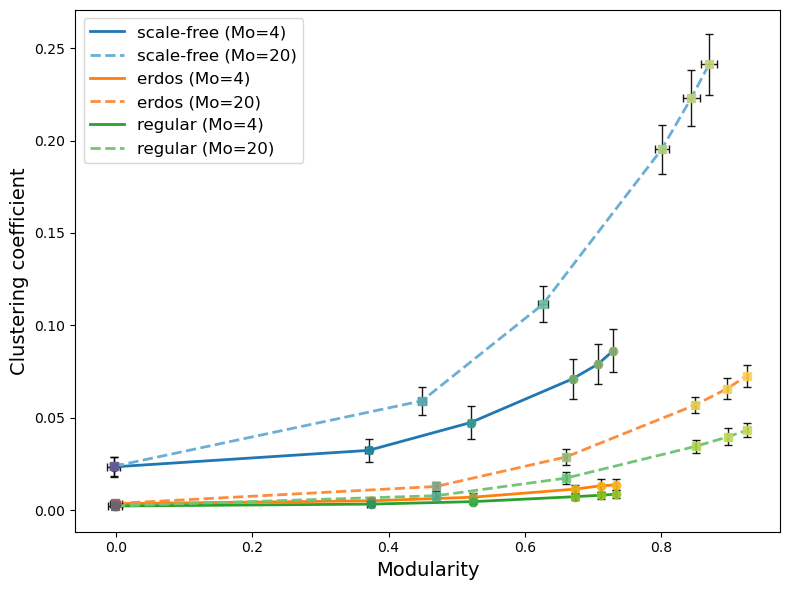

In [3]:
import matplotlib.pyplot as plt
from matplotlib import cm

net_list = ["scale-free", "erdos", "regular"]
colors_mo4 = {"scale-free": "tab:blue", "erdos": "tab:orange", "regular": "tab:green"}
colors_mo20 = {"scale-free": "#6baed6", "erdos": "#fd8d3c", "regular": "#74c476"}
w_list = [0.00, 0.50, 0.70, 0.90, 0.95, 0.98]

plt.figure(figsize=(8, 6))

for net in net_list:
    # mo=4
    df4 = pd.read_csv(f"{net}_mo4_modularity_vs_clustering.csv")
    means4 = df4.groupby("w").agg({"modularity": "mean", "clustering": "mean"})
    stds4 = df4.groupby("w").agg({"modularity": "std", "clustering": "std"})
    cmap = cm.get_cmap("viridis")
    norm = plt.Normalize(min(w_list), max(w_list))
    base_rgb4 = np.array(plt.get_cmap("tab10")(list(colors_mo4.keys()).index(net))[:3])
    for w in w_list:
        sub = df4[df4["w"] == w]
        mean_mod = sub["modularity"].mean()
        mean_clust = sub["clustering"].mean()
        std_mod = sub["modularity"].std()
        std_clust = sub["clustering"].std()
        grad_rgb = np.array(cmap(norm(w))[:3])
        blend_rgb = base_rgb4 * 0.5 + grad_rgb * 0.5
        plt.errorbar(mean_mod, mean_clust, xerr=std_mod, yerr=std_clust,
                     fmt='o', color=blend_rgb, ecolor="black", elinewidth=1, capsize=3, label=None, alpha=0.9)
    plt.plot(means4["modularity"], means4["clustering"], '-', color=colors_mo4[net], label=f"{net} (Mo=4)", linewidth=2)

    # mo=20
    df20 = pd.read_csv(f"{net}_mo20_modularity_vs_clustering.csv")
    means20 = df20.groupby("w").agg({"modularity": "mean", "clustering": "mean"})
    stds20 = df20.groupby("w").agg({"modularity": "std", "clustering": "std"})
    base_rgb20 = np.array(plt.get_cmap("tab10")(list(colors_mo4.keys()).index(net))[:3]) * 0.5 + np.array([1,1,1]) * 0.5
    for w in w_list:
        sub = df20[df20["w"] == w]
        mean_mod = sub["modularity"].mean()
        mean_clust = sub["clustering"].mean()
        std_mod = sub["modularity"].std()
        std_clust = sub["clustering"].std()
        grad_rgb = np.array(cmap(norm(w))[:3])
        blend_rgb = base_rgb20 * 0.5 + grad_rgb * 0.5
        plt.errorbar(mean_mod, mean_clust, xerr=std_mod, yerr=std_clust,
                     fmt='s', color=blend_rgb, ecolor="black", elinewidth=1, capsize=3, label=None, alpha=0.9)
    plt.plot(means20["modularity"], means20["clustering"], '--', color=colors_mo20[net], label=f"{net} (Mo=20)", linewidth=2)

plt.xlabel("Modularity", fontsize=14)
plt.ylabel("Clustering coefficient", fontsize=14)
plt.legend(fontsize=12, loc="upper left")
plt.tight_layout()
plt.show()

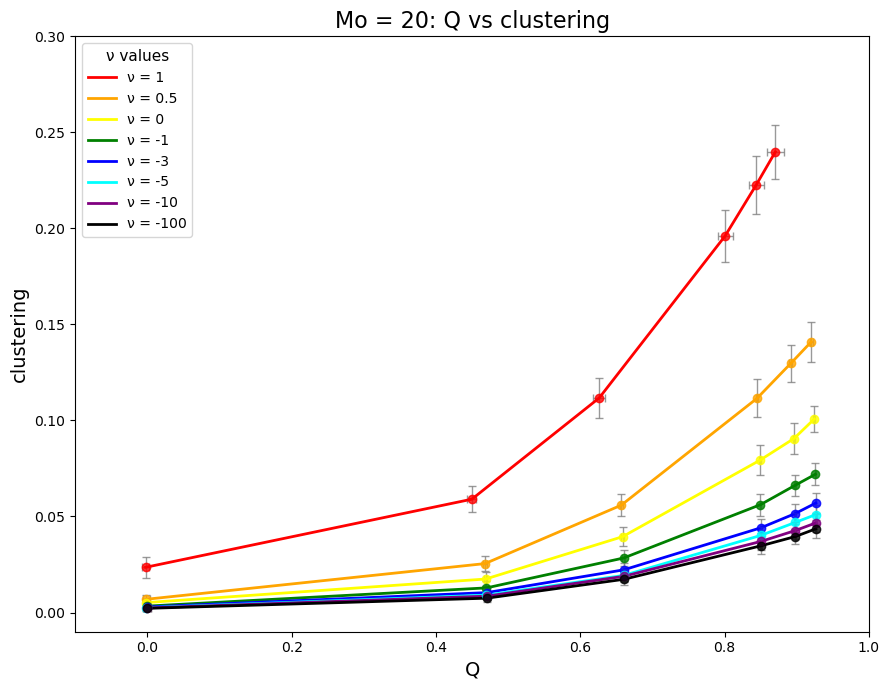

In [2]:
color_list = [
    "red",       # β = 1
    "orange",    # β = 0.5
    "yellow",    # β = 0
    "green",     # β = -1
    "blue",      # β = -3
    "cyan",      # β = -5
    "purple",    # β = -10
    "black",     # β = -100
]

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# betaのリストと色の固定対応
beta_list = [1, 0.5, 0, -1, -3, -5, -10, -100]
color_list = ["red", "orange", "yellow", "green", "blue", "cyan", "purple", "black"]
color_map = dict(zip(beta_list, color_list))

w_list = [0.00, 0.50, 0.70, 0.90, 0.95, 0.98]
Mo = 20

plt.figure(figsize=(9, 7))

for beta in beta_list:
    df = pd.read_csv(f"~/o_t_hayashilab/network_code/result/mo{Mo}_beta{beta}modularity_vs_clustering.csv")
    df = df[df["w"].isin(w_list)]

    # 平均・標準偏差の取得
    means = df.groupby("w").agg({"modularity": "mean", "clustering": "mean"})
    stds = df.groupby("w").agg({"modularity": "std", "clustering": "std"})

    for w in w_list:
        sub = df[df["w"] == w]
        mean_mod = sub["modularity"].mean()
        mean_fied = sub["clustering"].mean()
        std_mod = sub["modularity"].std()
        std_fied = sub["clustering"].std()
        plt.errorbar(mean_mod, mean_fied, xerr=std_mod, yerr=std_fied,
                     fmt='o', color=color_map[beta], ecolor="gray", elinewidth=1, capsize=3, alpha=0.8)

    # トレンド線
    plt.plot(means["modularity"], means["clustering"], '-', linewidth=2,
             color=color_map[beta], label=f"ν = {beta}")

# 軸・タイトル・凡例など
plt.xlabel("Q", fontsize=14)
plt.ylabel("clustering", fontsize=14)
plt.title(f"Mo = {Mo}: Q vs clustering", fontsize=16)
plt.xlim(-0.1, 1.0)
plt.ylim(-0.01, 0.30)
plt.legend(title="ν values", fontsize=10, title_fontsize=11, loc="upper left")
plt.grid(False)
plt.tight_layout()
plt.show()
